### Mathematical formulations for structure problems.
#### Table of contents
1. [Network generation](#network)
2. [The maximum clique problem](#clique)
    1. [The maximum independent set problem](#independent)
3. [The maximum induced star problem](#star)
4. [The maximum quasi-clique problem](#quasiclique)
5. [The maximum $k$-club problem](#kclub)
6. [Using networkx](#networkx)

### Creating and visualizing the network <a name="network"></a>

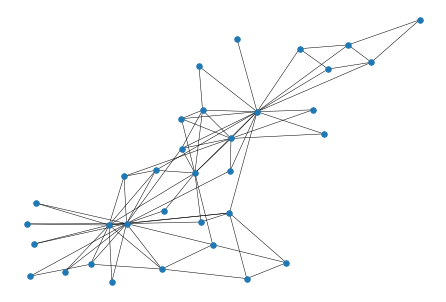

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from gurobipy import *
from itertools import combinations

G = nx.karate_club_graph()
pos=nx.spring_layout(G)
nx.draw(G, node_size=30, width=0.5)

#### The maximum clique problem <a name="clique"></a>

$$\max~~\sum_{i\in V} x_i$$
$$\text{s.t}~~x_i+x_j\leq 1, ~\forall \left(i,j\right)\notin E$$
$$~x_i\in\left\{0,1\right\}, ~\forall i\in V.$$

In [2]:
model=Model("max_clique")
x=model.addVars(G.nodes(), vtype=GRB.BINARY, obj=-1)

for (i,j) in combinations(G.nodes(),2):
    if (i,j) not in G.edges():
        model.addConstr(x[i]+x[j]<=1)
model.optimize()

Academic license - for non-commercial use only - expires 2022-08-21
Using license file /Users/leo/gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 483 rows, 34 columns and 966 nonzeros
Model fingerprint: 0x4bd3660c
Variable types: 0 continuous, 34 integer (34 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -5.0000000
Presolve removed 468 rows and 25 columns
Presolve time: 0.01s
Presolved: 15 rows, 9 columns, 30 nonzeros
Found heuristic solution: objective -5.0000000
Variable types: 0 continuous, 9 integer (9 binary)

Root relaxation: cutoff, 0 iterations, 0.00 seconds

Explored 0 nodes (0 simplex iterations) in 0.03 seconds
Thread count was 8 (of 8 available processors)

Solution count 2: -5 -5 
No other solutions bette

#### Showing the max clique.

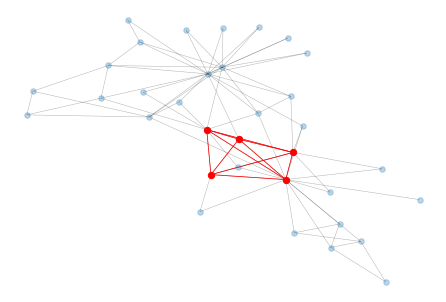

In [3]:
clique_nodes=[i for i in G.nodes() if x[i].X==1]
clique_edges=[(i,j) for (i,j) in G.edges() if i in clique_nodes and j in clique_nodes]

nx.draw(G, pos, node_size=30, width=0.5, alpha=0.3)
nx.draw_networkx_nodes(G, pos, nodelist=clique_nodes, node_color='r', node_size=40)
nx.draw_networkx_edges(G, pos, edgelist=clique_edges, edge_color='r', width=0.75)

#### The maximum independent set problem <a name="independent"></a>

$$\max~~\sum_{i\in V} x_i$$
$$\text{s.t}~~x_i+x_j\leq 1, ~\forall \left(i,j\right)\in E$$
$$~x_i\in\left\{0,1\right\}, ~\forall i\in V.$$

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 78 rows, 34 columns and 156 nonzeros
Model fingerprint: 0x50264a81
Variable types: 0 continuous, 34 integer (34 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -13.0000000
Presolve removed 74 rows and 30 columns
Presolve time: 0.00s
Presolved: 4 rows, 4 columns, 8 nonzeros
Found heuristic solution: objective -20.0000000
Variable types: 0 continuous, 4 integer (4 binary)

Root relaxation: cutoff, 0 iterations, 0.00 seconds

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 8 (of 8 available processors)

Solution count 2: -20 -13 
No other solutions better than -20

Optimal solution found (tolerance 1.00e-04)
Best objective -2.000000000000e+01, best bound -2.000

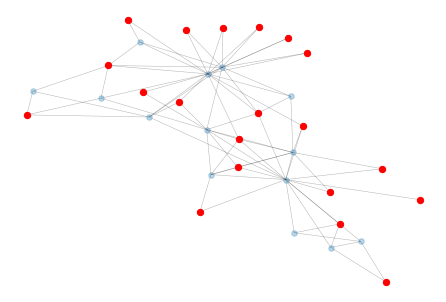

In [4]:
model=Model("max_independent_set")
x=model.addVars(G.nodes(), vtype=GRB.BINARY, obj=-1)

for (i,j) in G.edges():
    model.addConstr(x[i]+x[j]<=1)
model.optimize()

IS_nodes=[i for i in G.nodes() if x[i].X==1]

nx.draw(G, pos, node_size=30, width=0.5, alpha=0.3)
nx.draw_networkx_nodes(G, pos, nodelist=IS_nodes, node_color='r', node_size=40)

#### The maximum induced star problem <a name="star"></a>

In [5]:
model=Model("max_star")
y=model.addVars(G.nodes(), vtype=GRB.BINARY, obj=-1)
x=model.addVars(G.nodes(), vtype=GRB.BINARY, obj=-1)

for (i,j) in G.edges():
    model.addConstr(y[i]+y[j]<=1)

for i in G.nodes():
    model.addConstr(y[i]<=quicksum(x[j] for j in G.neighbors(i)))

model.addConstr(quicksum(x[i] for i in G.nodes())==1)
    
model.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 113 rows, 68 columns and 380 nonzeros
Model fingerprint: 0x09fbf344
Variable types: 0 continuous, 68 integer (68 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -4.0000000
Presolve removed 42 rows and 17 columns
Presolve time: 0.00s
Presolved: 71 rows, 51 columns, 271 nonzeros
Variable types: 0 continuous, 51 integer (51 binary)

Root relaxation: objective -1.450000e+01, 34 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  -14.50000    0   23   -4.00000  -14.50000   262%     -    0s
H    0     0                     -12.0000000  -14.50000  20.8%

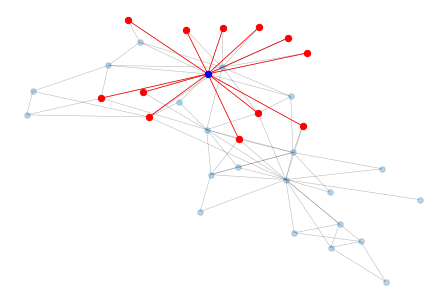

In [6]:
star_nodes=[i for i in G.nodes() if y[i].X==1]
center=[i for i in G.nodes() if x[i].X==1]
star_edges=[(i,j) for (i,j) in G.edges() if i in star_nodes and j in center]

nx.draw(G, pos, node_size=30, width=0.5, alpha=0.3)
nx.draw_networkx_nodes(G, pos, nodelist=star_nodes, node_color='r', node_size=40)
nx.draw_networkx_nodes(G, pos, nodelist=center, node_color='b', node_size=40)
nx.draw_networkx_edges(G, pos, edgelist=star_edges, edge_color='r', width=0.75)

#### The maximum quasi-clique problem <a name="quasiclique"></a>

In [15]:
gamma=0.7
#smaller gamma value means more combinations -- bigger gamma value means less combinations
model=Model("max_quasi_clique")
w={}
for (i,j) in combinations(G.nodes(),2):
    w[i,j]=model.addVar(vtype=GRB.BINARY)
x=model.addVars(G.nodes(), vtype=GRB.BINARY, obj=-1)

for (i,j) in combinations(G.nodes(),2):
    model.addConstr(w[i,j]<=x[i])
    model.addConstr(w[i,j]<=x[j])
    model.addConstr(w[i,j]>=x[i]+x[j]-1)

model.addConstr(quicksum(w[i,j] for (i,j) in G.edges())>=gamma*quicksum(w[i,j] for (i,j) in combinations(G.nodes(),2)))
    
model.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1684 rows, 595 columns and 4488 nonzeros
Model fingerprint: 0xf8c166f9
Variable types: 0 continuous, 595 integer (595 binary)
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -1.0000000
Presolve time: 0.01s
Presolved: 1684 rows, 595 columns, 4488 nonzeros
Variable types: 0 continuous, 595 integer (595 binary)

Root relaxation: objective -1.801042e+01, 1019 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  -18.01042    0  161   -1.00000  -18.01042  1701%     -    0s
H    0     0                      -5.0000000  -18.01042   260%     -    0s
H    0     0  

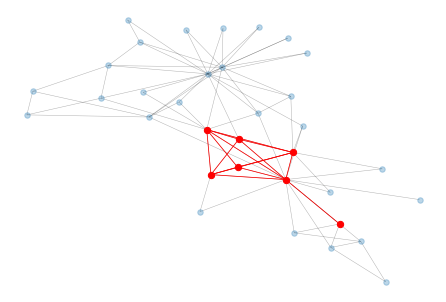

In [16]:
quasi_clique_nodes=[i for i in G.nodes() if x[i].X==1]
quasi_clique_edges=[(i,j) for (i,j) in G.edges() if i in quasi_clique_nodes and j in quasi_clique_nodes]

nx.draw(G, pos, node_size=30, width=0.5, alpha=0.3)
nx.draw_networkx_nodes(G, pos, nodelist=quasi_clique_nodes, node_color='r', node_size=40)
nx.draw_networkx_edges(G, pos, edgelist=quasi_clique_edges, edge_color='r', width=0.75)

#### The maximum $\boldsymbol{k}$-club problem <a name="kclub"></a>

In [13]:
paths={}
k=2
model=Model("max_k_club")
for (i,j) in combinations(G.nodes(),2):
    paths[i,j] = list(nx.all_simple_paths(G, source=i, target=j, cutoff=k))
    
x=model.addVars(G.nodes(), vtype=GRB.BINARY, obj=-1, name="x"+str(i))
y={}
for (i,j) in combinations(G.nodes(),2):
    for p in paths[i,j]:
        y[tuple(p)]=model.addVar(vtype=GRB.BINARY, obj=0, name="y"+str(p))

for (i,j) in combinations(G.nodes(),2):
    model.addConstr(x[i]+x[j]<=1+quicksum(y[tuple(p)] for p in paths[i,j]))
for (i,j) in combinations(G.nodes(),2):
    for p in paths[i,j]:
        for ell in p:
            model.addConstr(x[ell]>=y[tuple(p)])
model.write("test.lp")
model.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2301 rows, 640 columns and 5208 nonzeros
Model fingerprint: 0x2b72de8d
Variable types: 0 continuous, 640 integer (640 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -1.0000000
Presolve removed 65 rows and 0 columns
Presolve time: 0.01s
Presolved: 2236 rows, 640 columns, 5228 nonzeros
Variable types: 0 continuous, 640 integer (640 binary)

Root relaxation: objective -1.800000e+01, 249 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     -18.0000000  -18.00000  0.00%     -    0s

Explored 0 nodes (249 simplex iterations) in 0.03 

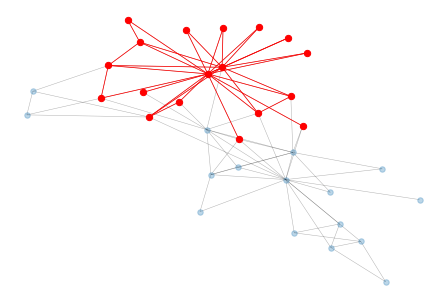

In [14]:
k_club_nodes=[i for i in G.nodes() if x[i].X==1]
k_club_edges=[(i,j) for (i,j) in G.edges() if i in k_club_nodes and j in k_club_nodes]

nx.draw(G, pos, node_size=30, width=0.5, alpha=0.3)
nx.draw_networkx_nodes(G, pos, nodelist=k_club_nodes, node_color='r', node_size=40)
nx.draw_networkx_edges(G, pos, edgelist=k_club_edges, edge_color='r', width=0.75)

#### Cliques and independent sets can also be found through ``networkx`` <a name="networkx"></a>

In [17]:
from networkx.algorithms import approximation
IS_nodes=approximation.maximum_independent_set(G)
print(IS_nodes)
clique_nodes=approximation.max_clique(G)
print(clique_nodes)

{4, 5, 7, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28}
{0, 1, 2, 3, 7}


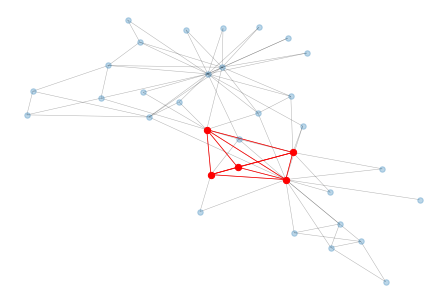

In [18]:
clique_edges=[(i,j) for (i,j) in G.edges() if i in clique_nodes and j in clique_nodes]
nx.draw(G, pos, node_size=30, width=0.5, alpha=0.3)
nx.draw_networkx_nodes(G, pos, nodelist=clique_nodes, node_color='r', node_size=40)
nx.draw_networkx_edges(G, pos, edgelist=clique_edges, edge_color='r', width=0.75)

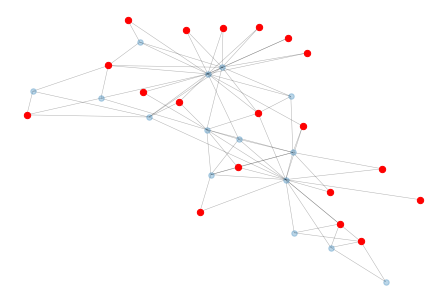

In [19]:
nx.draw(G, pos, node_size=30, width=0.5, alpha=0.3)
nx.draw_networkx_nodes(G, pos, nodelist=IS_nodes, node_color='r', node_size=40)